# Weather Text

This notebook is basically an experiment looking at historical weather text in NOAA's [Storms Events Database](https://www.ncdc.noaa.gov/stormevents/).

## Download Data

First lets download the CSV data from NOAA's [index page](https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/). You can see that they make several types of CSV files available. We are interested (for the moment) in the storm event files that go back to 1950 and have names that start like `StormEvents_details`.
[requests_html](https://requests-html.kennethreitz.org/) makes it pretty easy to scrape the CSV URLs we want out of the page, and we can load them into a huge pandas DataFrame, by concatenating each one after it has been loaded by its URL. Yes pandas can load gzipped CSV data from a URL...

In [2]:
!pip install --quiet requests-html pandas tqdm

     |████████████████████████████████| 153kB 11.7MB/s 
     |████████████████████████████████| 81kB 6.8MB/s 
ERROR: pyppeteer 0.2.2 has requirement tqdm<5.0.0,>=4.42.1, but you'll have tqdm 4.41.1 which is incompatible.
ERROR: pyppeteer 0.2.2 has requirement urllib3<2.0.0,>=1.25.8, but you'll have urllib3 1.24.3 which is incompatible.


Get the URLs for the CSVs and add each of them to a big pandas `DataFrame`.


In [3]:
import pandas
import requests_html

from tqdm import tqdm

http = requests_html.HTMLSession()
url = 'https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/'
resp = http.get(url)

df = pandas.DataFrame()
for link in tqdm(resp.html.find('a')):
  if 'StormEvents_details-ftp_v1.0' in link.attrs['href']:
    csv_url = url + link.attrs['href']
    df = pandas.concat([df, pandas.read_csv(csv_url)])

 24%|██▍       | 53/222 [00:31<03:12,  1.14s/it]/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
 24%|██▍       | 54/222 [00:33<03:43,  1.33s/it]/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
 28%|██▊       | 62/222 [00:51<06:21,  2.38s/it]/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29,34,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
100%|██████████| 222/222 [01:50<00:00,  2.01it/s]


In [5]:
df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40.0,1950,April,Tornado,C,149,WASHITA,NaN,28-APR-50 14:45:00,CST,28-APR-50 14:45:00,0,0,0,0,250K,0,NaN,0.0,NaN,NaN,NaN,F3,3.4,400.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,35.1200,-99.2000,35.1700,-99.2000,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48.0,1950,April,Tornado,C,93,COMANCHE,NaN,29-APR-50 15:30:00,CST,29-APR-50 15:30:00,0,0,0,0,25K,0,NaN,0.0,NaN,NaN,NaN,F1,11.5,200.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,31.9000,-98.6000,31.7300,-98.6000,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42.0,1950,July,Tornado,C,77,LEHIGH,NaN,05-JUL-50 18:00:00,CST,05-JUL-50 18:00:00,2,0,0,0,25K,0,NaN,0.0,NaN,NaN,NaN,F2,12.9,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.5800,-75.7000,40.6500,-75.4700,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42.0,1950,July,Tornado,C,43,DAUPHIN,NaN,05-JUL-50 18:30:00,CST,05-JUL-50 18:30:00,0,0,0,0,2.5K,0,NaN,0.0,NaN,NaN,NaN,F2,0.0,13.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.6000,-76.7500,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42.0,1950,July,Tornado,C,39,CRAWFORD,NaN,24-JUL-50 14:40:00,CST,24-JUL-50 14:40:00,0,0,0,0,2.5K,0,NaN,0.0,NaN,NaN,NaN,F0,0.0,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,41.6300,-79.6800,NaN,NaN,NaN,NaN,PUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40032,202006,18,600,202006,19,600,147668.0,899187,IOWA,19.0,2020,June,Heavy Rain,C,69,FRANKLIN,DMX,18-JUN-20 06:00:00,CST-6,19-JUN-20 06:00:00,0,0,0,0,0.00K,0.00K,COOP Observer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,S,HAMPTON,1.0,S,HAMPTON,42.7400,-93.2000,42.7400,-93.2000,An upper-level trough with associated surface ...,Coop observer reported a 24 hour rainfall tota...,CSV
40033,202006,18,600,202006,19,600,147668.0,899188,IOWA,19.0,2020,June,Heavy Rain,C,69,FRANKLIN,DMX,18-JUN-20 06:00:00,CST-6,19-JUN-20 06:00:00,0,0,0,0,0.00K,0.00K,COOP Observer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,HAMPTON,1.0,N,HAMPTON,42.7600,-93.2000,42.7600,-93.2000,An upper-level trough with associated surface ...,Coop observer reported a 24 hour rainfall tota...,CSV
40034,202006,22,2320,202006,24,915,148769.0,899497,IOWA,19.0,2020,June,Flood,C,171,TAMA,DMX,22-JUN-20 23:20:00,CST-6,24-JUN-20 09:15:00,0,0,0,0,0.00K,0.00K,Department of Highways,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,TRAER,0.0,E,TRAER,42.2000,-92.4700,42.2003,-92.4637,A surface low to the northwest of Iowa allowed...,The department of transportation relayed a rep...,CSV
40035,202006,23,38,202006,24,915,148769.0,899498,IOWA,19.0,2020,June,Flood,C,171,TAMA,DMX,23-JUN-20 00:38:00,CST-6,24-JUN-20 09:15:00,0,0,0,0,0.00K,0.00K,Department of Highways,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,TRAER,0.0,E,TRAER,42.2000,-92.4700,42.2001,-92.4647,A surface low to the northwest of Iowa allowed...,Iowa Department of Transportation and the Tama...,CSV


Since we're interested in textual content for these weather events maybe the EVENT_NARRATIVE and EPISODE_NARRATIVE columns could be interesting. Lets just try to load all the CVSs into one big DataFrame. Will Colab blow up, we'll see I guess...

Wow so it didn't blow up, it looks like it's just using 1.5GB of RAM for the 1.5 million rows?


## Narrative Text

Lets take a look at how many columns have `EPISODE_NARRATIVE`.

In [6]:
len(df[df['EPISODE_NARRATIVE'].notnull()]) / len(df)

0.7109169441003286

So about 71% of the events have episode narrative. How about the `EVENT_NARRATIVE`?



In [7]:
len(df[df['EVENT_NARRATIVE'].notnull()]) / len(df)

0.4982583244197391

Much less 50% have event narrative. About how long are these descriptions?


In [8]:
pandas.options.display.float_format = '{:,.2f}'.format

df['EVENT_NARRATIVE'].str.len().describe()

count   795,159.00
mean        143.69
std         201.10
min           1.00
25%          56.00
50%          84.00
75%         151.00
max      13,480.00
Name: EVENT_NARRATIVE, dtype: float64

In [9]:
df['EPISODE_NARRATIVE'].str.len().describe()

count   1,134,536.00
mean          615.10
std           932.01
min             1.00
25%           196.00
50%           351.00
75%           681.00
max        29,050.00
Name: EPISODE_NARRATIVE, dtype: float64

So the episode narratives are more common and longer. The longest episode narrative in here is 29,050 characters long! Uh, what is it?

In [10]:
longest_event = df[df['EPISODE_NARRATIVE'].str.len() == 29050]
longest_event

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
40833,200409,6,2000,200409,6,2200,"1,181,018.00",5424464,GEORGIA,13.00,2004,September,High Wind,Z,79,TALBOT,FFC,06-SEP-04 20:00:00,EST,06-SEP-04 22:00:00,0,0,0,0,200K,NaN,NEWSPAPER,35.00,ES,NaN,nan,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,"High wind damage, associated with Tropical Sto...",NaN,PDS
43459,200409,7,430,200409,7,630,"1,181,018.00",5424440,GEORGIA,13.00,2004,September,High Wind,Z,23,HALL,FFC,07-SEP-04 04:30:00,EST,07-SEP-04 06:30:00,0,0,0,0,175K,NaN,NEWSPAPER,35.00,ES,NaN,nan,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,"High wind damage, associated with Tropical Sto...",NaN,PDS
43460,200409,7,0,200409,7,200,"1,181,018.00",5424441,GEORGIA,13.00,2004,September,High Wind,Z,57,HENRY,FFC,07-SEP-04 00:00:00,EST,07-SEP-04 02:00:00,0,0,0,0,150K,NaN,NEWSPAPER,35.00,ES,NaN,nan,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,"High wind damage, associated with Tropical Sto...",NaN,PDS
43461,200409,7,0,200409,7,200,"1,181,018.00",5424443,GEORGIA,13.00,2004,September,High Wind,Z,59,JASPER,FFC,07-SEP-04 00:00:00,EST,07-SEP-04 02:00:00,0,0,0,0,500K,NaN,EMERGENCY MANAGER,35.00,ES,NaN,nan,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,"High wind damage, associated with Tropical Sto...",NaN,PDS
43462,200409,6,1900,200409,6,2200,"1,181,018.00",5424444,GEORGIA,13.00,2004,September,High Wind,Z,85,JOHNSON,FFC,06-SEP-04 19:00:00,EST,06-SEP-04 22:00:00,0,0,0,0,150K,NaN,NEWSPAPER,35.00,ES,NaN,nan,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,"High wind damage, associated with Tropical Sto...",NaN,PDS
43463,200409,6,1900,200409,6,2200,"1,181,018.00",5424445,GEORGIA,13.00,2004,September,High Wind,Z,72,JONES,FFC,06-SEP-04 19:00:00,EST,06-SEP-04 22:00:00,0,0,0,0,100K,NaN,NEWSPAPER,35.00,ES,NaN,nan,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,"High wind damage, associated with Tropical Sto...",NaN,PDS
43464,200409,6,2300,200409,7,100,"1,181,018.00",5424446,GEORGIA,13.00,2004,September,High Wind,Z,70,LAMAR,FFC,06-SEP-04 23:00:00,EST,07-SEP-04 01:00:00,0,0,0,0,150K,NaN,NEWSPAPER,35.00,ES,NaN,nan,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,"High wind damage, associated with Tropical Sto...",NaN,PDS
43473,200409,7,400,200409,7,600,"1,181,018.00",5424439,GEORGIA,13.00,2004,September,High Wind,Z,34,GWINNETT,FFC,07-SEP-04 04:00:00,EST,07-SEP-04 06:00:00,0,0,0,0,250K,NaN,NEWSPAPER,35.00,ES,NaN,nan,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,"High wind damage, associated with Tropical Sto...",NaN,PDS
43475,200409,6,1800,200409,6,2000,"1,181,018.00",5424447,GEORGIA,13.00,2004,September,High Wind,Z,97,LAURENS,FFC,06-SEP-04 18:00:00,EST,06-SEP-04 20:00:00,0,0,0,0,750K,NaN,NEWSPAPER,35.00,ES,NaN,nan,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,"High wind damage, associated with Tropical Sto...",NaN,PDS
43476,200409,6,1800,200409,6,2000,"1,181,018.00",5424448,GEORGIA,13.00,2004,September,High Wind,Z,93,MACON,FFC,06-SEP-04 18:00:00,EST,06-SEP-04 20:00:00,0,0,0,0,50K,NaN,NEWSPAPER,35.00,ES,NaN,nan,NaN,nan,nan,NaN,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,"High wind damage, associated with Tropical Sto...",NaN,PDS


So there are a few High Wind events with a episode summary that long. What does one of them look like? 

In [11]:
longest_event.loc[44687,'EPISODE_NARRATIVE']

'High wind damage, associated with Tropical Storm Frances, is listed below, in alphabetical order by county for those counties that "high wind" criteria was either met or assumed to be met.Baldwin:  The Georgia Emergency Management Agency reported that extensive and widespread wind damage was observed.  Many trees and power lines were down throughout the county and many parts of the county were expected to be without power for up to four days as a result.  In addition, four homes suffered major damage and five suffered minor damage.  One man was injured and taken to a local hospital when a tree fell on his mobile home.  Four to five inches of rain was also reported throughout the county, but no significant flooding problems were reported.  (Estimated Damage:  $500,000)Barrow:  The Barrow County News of Winder reported that many trees and power lines were down throughout the county.  A funeral home was damaged when the relatively new roof was peeled back by the high winds and a large tr

In [12]:
longest_event.loc[44602,'EPISODE_NARRATIVE']

'High wind damage, associated with Tropical Storm Frances, is listed below, in alphabetical order by county for those counties that "high wind" criteria was either met or assumed to be met.Baldwin:  The Georgia Emergency Management Agency reported that extensive and widespread wind damage was observed.  Many trees and power lines were down throughout the county and many parts of the county were expected to be without power for up to four days as a result.  In addition, four homes suffered major damage and five suffered minor damage.  One man was injured and taken to a local hospital when a tree fell on his mobile home.  Four to five inches of rain was also reported throughout the county, but no significant flooding problems were reported.  (Estimated Damage:  $500,000)Barrow:  The Barrow County News of Winder reported that many trees and power lines were down throughout the county.  A funeral home was damaged when the relatively new roof was peeled back by the high winds and a large tr

How prevalent are duplicates in the episode narratives? One way to measure would be to get all the events with `not null` episode summaries, and get the ratio of unique summaries to total summaries.




In [13]:
not_null_ep = df[df['EPISODE_NARRATIVE'].notnull()]
len(not_null_ep['EPISODE_NARRATIVE'].unique()) / len(not_null_ep)

0.17626236628894984

So only 17% of the episode narratives are unique. This is hella low. Are event narratives different?

In [14]:
not_null_ev = df[df['EVENT_NARRATIVE'].notnull()]
len(not_null_ev['EVENT_NARRATIVE'].unique()) / len(not_null_ev)

0.8465464139876427

So there are less of them, but the event narratives are much more unique.

How much text are we talking about here? If we were to calculate the total number of characters in the episode narratives how would it compare to Joyce's Ulysses?

In [16]:
episodes_text_len = df['EPISODE_NARRATIVE'].str.len().sum()
episodes_text_len

697852580.0

In [17]:
ulysses_len = len(http.get('https://www.gutenberg.org/files/4300/4300-0.txt').text)
ulysses_len

1586488

In [18]:
episodes_text_len / ulysses_len

439.87258649293284

[link text](https://)So there are 209 Ulysses worth of weather text.  But there's a lot duplication. What if we remove the duplicates?

In [19]:
sum([len(s) for s in not_null_ep['EPISODE_NARRATIVE'].unique()]) / ulysses_len

46.89680854818946

So only 46 Ulysses of unique episode narrative then. What about for events?

In [40]:
sum([len(s) for s in not_null_ev['EVENT_NARRATIVE'].unique()]) / ulysses_len

63.01335654603123

## Events Over Time

This notebook isn't concerned with the events themselves but it could be interesting to explore a bit about what is present in the dataset before looking at the narrative text.

Lets convert the date related columns into a proper datetime that we can then calculate with.

In [20]:
df['BEGIN'] = df['BEGIN_YEARMONTH'].apply(str) + df['BEGIN_DAY'].apply(str)
df['BEGIN'] = pandas.to_datetime(df['BEGIN'], format='%Y%m%d')
df['BEGIN']

0       1950-04-28
1       1950-04-29
2       1950-07-05
3       1950-07-05
4       1950-07-24
           ...    
40032   2020-06-18
40033   2020-06-18
40034   2020-06-22
40035   2020-06-23
40036   2020-06-23
Name: BEGIN, Length: 1595877, dtype: datetime64[ns]

How do the events look over the years?


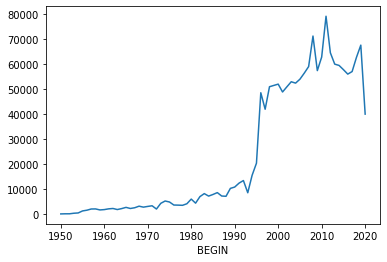

In [21]:
df.groupby(df.BEGIN.dt.year).count().EVENT_ID.plot()


Huh, I wonder what happened in the mid 90s?! What does the event summary text look like over time? First to make it easier we'll add a new column that includes the length of the event narrative.


In [22]:
df['EVENT_NARRATIVE_LENGTH'] = df['EVENT_NARRATIVE'].str.len()

In [23]:
pandas.set_option('display.max_rows', 100)
df['EVENT_NARRATIVE_LENGTH'].groupby(df['BEGIN'].dt.year).agg({'sum'})

,sum
BEGIN,
1950,0.00
1951,0.00
1952,0.00
1953,0.00
1954,0.00
1955,0.00
1956,0.00
1957,0.00
1958,0.00


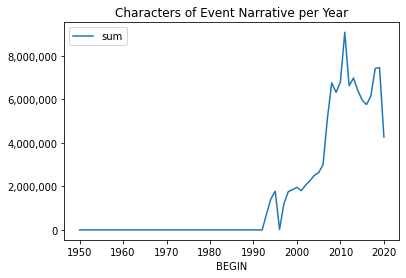

In [24]:
import matplotlib.ticker as ticker

p = df['EVENT_NARRATIVE_LENGTH'].groupby(df['BEGIN'].dt.year).agg({'sum'}).plot()
p.set_title('Characters of Event Narrative per Year')
p.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
p

Does episode text look the same?





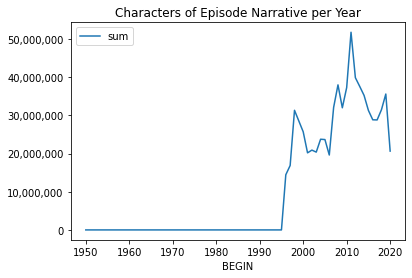

In [25]:
df['EPISODE_NARRATIVE_LENGTH'] = df['EPISODE_NARRATIVE'].str.len()

import matplotlib.ticker as ticker

yearly_episode_text = df['EPISODE_NARRATIVE_LENGTH'].groupby(df['BEGIN'].dt.year).agg({'sum'})
p = yearly_episode_text.plot()
p.set_title('Characters of Episode Narrative per Year')
p.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

## Event Type

All the events have a type. What do they look like?


In [26]:
df['EVENT_TYPE'].describe()

count               1595877
unique                   74
top       Thunderstorm Wind
freq                 452851
Name: EVENT_TYPE, dtype: object

So there are 74 unique event types.

In [28]:
for r in df['EVENT_TYPE'].groupby(df['BEGIN'].dt.year).value_counts().iteritems():
  print(r)



((1950, 'Tornado'), 223)
((1951, 'Tornado'), 269)
((1952, 'Tornado'), 272)
((1953, 'Tornado'), 492)
((1954, 'Tornado'), 609)
((1955, 'Tornado'), 632)
((1955, 'Thunderstorm Wind'), 421)
((1955, 'Hail'), 360)
((1956, 'Thunderstorm Wind'), 735)
((1956, 'Tornado'), 567)
((1956, 'Hail'), 401)
((1957, 'Tornado'), 930)
((1957, 'Thunderstorm Wind'), 775)
((1957, 'Hail'), 479)
((1958, 'Thunderstorm Wind'), 899)
((1958, 'Hail'), 706)
((1958, 'Tornado'), 608)
((1959, 'Thunderstorm Wind'), 652)
((1959, 'Tornado'), 630)
((1959, 'Hail'), 531)
((1960, 'Thunderstorm Wind'), 719)
((1960, 'Tornado'), 645)
((1960, 'Hail'), 581)
((1961, 'Tornado'), 772)
((1961, 'Thunderstorm Wind'), 752)
((1961, 'Hail'), 722)
((1962, 'Hail'), 886)
((1962, 'Thunderstorm Wind'), 830)
((1962, 'Tornado'), 673)
((1963, 'Thunderstorm Wind'), 823)
((1963, 'Hail'), 652)
((1963, 'Tornado'), 493)
((1964, 'Thunderstorm Wind'), 909)
((1964, 'Tornado'), 760)
((1964, 'Hail'), 679)
((1965, 'Thunderstorm Wind'), 1044)
((1965, 'Tornado'),

So until the mid 1990s no even types other than Thunderstorm Wind, Tornados and Hail were tracked.

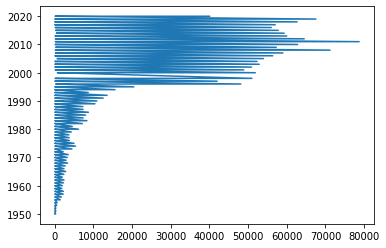

In [29]:
df[df['BEGIN'] < '1991-01-01']['EVENT_TYPE'].value_counts().head(25).plot(kind='bar', title='Event Type Counts (pre-1991)')

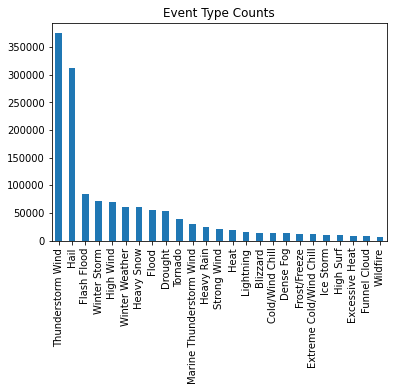

In [30]:
df[df['BEGIN'] > '1991-01-01']['EVENT_TYPE'].value_counts().head(25).plot(kind='bar', title='Event Type Counts')

## Sentiment

Assing a sentiment value to the summaries.

In [32]:
!pip install --quiet vaderSentiment

In [36]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

vader = SentimentIntensityAnalyzer()
vader.polarity_scores("Shit, this sucks")


{'compound': -0.7269, 'neg': 0.859, 'neu': 0.141, 'pos': 0.0}

In [38]:
vader.polarity_scores("Wow, this is awesome!")

{'compound': 0.8478, 'neg': 0.0, 'neu': 0.196, 'pos': 0.804}

In [39]:
def sentiment(s):
  if type(s) == str:
    return vader.polarity_scores(s)['compound']
  else:
    return None

df['EVENT_NARRATIVE_SENTIMENT'] = df['EVENT_NARRATIVE'].apply(sentiment)


In [ ]:
df['EVENT_NARRATIVE_SENTIMENT'].describe()

count   795,159.00
mean         -0.09
std           0.31
min          -1.00
25%          -0.20
50%           0.00
75%           0.00
max           0.99
Name: EVENT_NARRATIVE_SENTIMENT, dtype: float64

This is probably foolish but what does the yearly sentiment look like? We can average all the sentiment values.

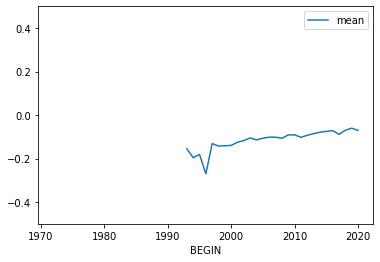

In [ ]:
p = df['EVENT_NARRATIVE_SENTIMENT'].groupby(df['BEGIN'].dt.year).agg({'mean'}).plot()
p.set_ybound(-.5,.5)

The average sentiment scores are gradually getting more positive?

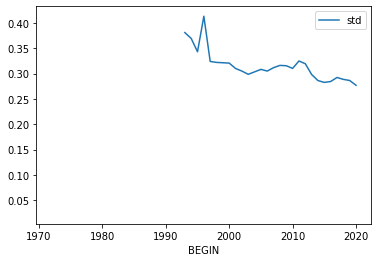

In [ ]:
p = df['EVENT_NARRATIVE_SENTIMENT'].groupby(df['BEGIN'].dt.year).agg({'std'}).plot()


The standard deviation score is gradually going down, so as the average score increases, there is less variability in the sentiment scores over the year.

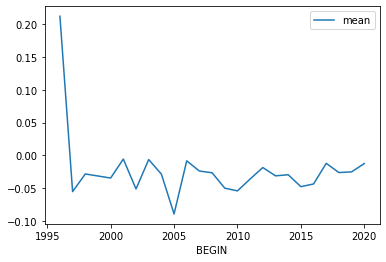

In [ ]:
def event_sentiment(event_type):
  e = df[df['EVENT_TYPE'] == event_type]
  return e['EVENT_NARRATIVE_SENTIMENT'].groupby(e['BEGIN'].dt.year).agg({'mean'}).plot()

event_sentiment('Heavy Snow')

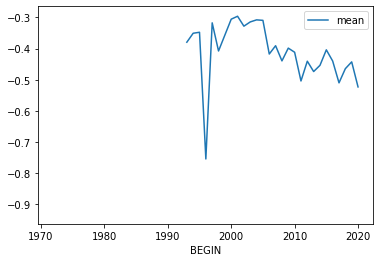

In [ ]:
event_sentiment('Tornado')

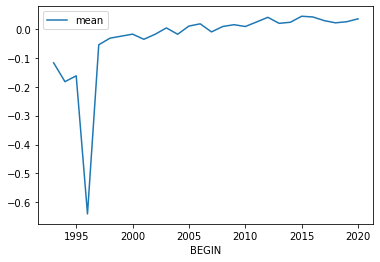

In [ ]:
event_sentiment('Hail')

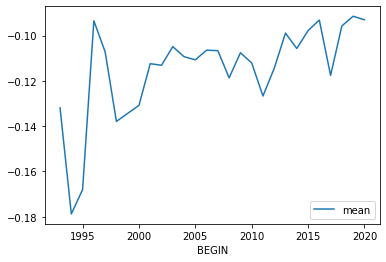

In [ ]:
event_sentiment('Thunderstorm Wind')

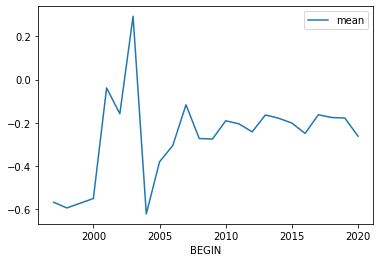

In [ ]:
event_sentiment('Drought')

In [ ]:
df['EVENT_NARRATIVE_SENTIMENT'].groupby(df['EVENT_TYPE']).agg({'mean'}).sort_values('mean', ascending=True)

,mean
EVENT_TYPE,
TORNADO/WATERSPOUT,-0.98
"TORNADOES, TSTM WIND, HAIL",-0.96
HAIL FLOODING,-0.74
THUNDERSTORM WINDS/ FLOOD,-0.73
HAIL/ICY ROADS,-0.71
Hurricane (Typhoon),-0.71
Dust Devil,-0.70
OTHER,-0.66
Lightning,-0.55


In [ ]:
df.to_csv('weather-events.csv')

In [ ]:
!gzip weather-events.csv

In [ ]:
! cp weather-events.csv.gz "My Drive"